In [31]:
import random
import numpy as np
from matplotlib import pyplot as plt

alphabet = "abcdefghijklmnopqrstuvwxyzABCDEFGHIJKLMNOPQRSTUVWXYZ,.! " #A
target = "Hello World!" #B

In [32]:
class Individual: #C
    def __init__(self, string, fitness=0):
        self.string = string
        self.fitness = fitness

from difflib import SequenceMatcher

def similar(a, b): #D
    return SequenceMatcher(None, a, b).ratio()

def spawn_population(length=26,size=100): #E
    pop = []
    for i in range(size):
        string = ''.join(random.choices(alphabet,k=length))
        individual = Individual(string)
        pop.append(individual)
    return pop


In [33]:
def recombine(p1_, p2_): #A
    p1 = p1_.string
    p2 = p2_.string
    child1 = []
    child2 = []
    cross_pt = random.randint(0,len(p1))
    child1.extend(p1[0:cross_pt])
    child1.extend(p2[cross_pt:])
    child2.extend(p2[0:cross_pt])
    child2.extend(p1[cross_pt:])
    c1 = Individual(''.join(child1))
    c2 = Individual(''.join(child2))
    return c1, c2

def mutate(x, mut_rate=0.01): #B
    new_x_ = []
    for char in x.string:
        if random.random() < mut_rate:
            new_x_.extend(random.choices(alphabet,k=1))
        else:
            new_x_.append(char)
    new_x = Individual(''.join(new_x_))
    return new_x

#A This function recombines two parent strings into two new offspring
#B This function will mutate a string by randomly flipping characters

In [34]:
def evaluate_population(pop, target): #A
    avg_fit = 0
    for i in range(len(pop)):
        fit = similar(pop[i].string, target)
        pop[i].fitness = fit
        avg_fit += fit
    avg_fit /= len(pop)
    return pop, avg_fit

def next_generation(pop, size=100, length=26, mut_rate=0.01): #B
    new_pop = []
    while len(new_pop) < size:
        parents = random.choices(pop,k=2, weights=[x.fitness for x in pop])
        offspring_ = recombine(parents[0],parents[1])
        child1 = mutate(offspring_[0], mut_rate=mut_rate)
        child2 = mutate(offspring_[1], mut_rate=mut_rate)
        offspring = [child1, child2]
        new_pop.extend(offspring)
    return new_pop

#A This function assigns a fitness score to each individual in the population
#B This function generates a new generation by recombination and mutation

In [39]:
num_generations = 500
population_size = 900
str_len = len(target)
mutation_rate = 0.001 #A

pop_fit = []
pop = spawn_population(size=population_size, length=str_len) #B
done = False
for gen in range(num_generations):
    pop, avg_fit = evaluate_population(pop, target)
    pop_fit.append(avg_fit) #C
    new_pop = next_generation(pop, \
        size=population_size, length=str_len, mut_rate=mutation_rate)
    pop = new_pop
    print(pop[0].string)
    for x in pop: 
        if x.string == target: 
            print("Target Found!")
            done = True
    if done:
        break
#A Set the mutation rate to 0.1%
#B Create the initial random population
#C Record population average fitness over training time

beEWQlDhvkww
NIlhhzJdwAbw
GeIQtsEwr!k 
hlbfAHHVShTL
oyGAwkproVdH
HxKkFlHeToAs
CNHYhWXBMibw
FNhnYflHoVd!
HSWglmlDKod!
 ae QQWoCdW!
Hxm ZMmoY!pk
All.UiNrdsEi
AI.SPllHoVQQ
HPH WlI.C!Q!
ceH WWIWoWdy
All.bWolvTlH
sHo.bkBql!kG
nHH Wlo!oVdH
HiWBold!omld
cHo.WDmDorEH
o TnDllyV!dH
eHtRbSloldey
Nll IlIWl!f,
Hll WnWooVdo
belMKnr  Hd!
 lH Wlorl!d!
HHolollwl!e!
HoH WDTrl!Ei
lll WlXDo!A!
Heo smorlr !
Cll WdTrldxH
eelFbIlWord!
ollR,lTrjrd!
HHo WllDolQU
cll WDlDosdU
HtWgolWrjsdH
Heo Wlorl!l!
Hel WlWoldd!
Heo WnlorrdU
eel W,WHord!
HlC Wllilod!
Hel.SlWorld!
Hll WDlWo!d!
eeH WloWl!l!
Hll cWlyoVd!
Hlo WlWrlsdU
Hlo WWIWl!dq
Hel WlTroll!
elo eloroVd!
HlH WlIWr!E!
Hel .loHo!d!
Hlo WzXWold!
Hlo ,llWorl!
Heo WlTDlVd!
Hel WWXWlrd!
Hel WlWrrrd!
Hll WWlrorl!
Hel kdorold!
Hel WnXHwKd!
Hel Wlsrlld!
HeW Wlorold!
Hel Wllrord!
Heo Wdorord!
Hll WlWWord!
Hel W,lrord!
Heo WDlrorl!
Heo WWoWord!
Heo WlXHd!p!
Hel Wlorodd!
Hlo WllrwKd!
Hll Wllrord!
ell WWlrord!
Hel.WlIawrd!
Hll WloWold!
Hll WllWord!
Hel WWorord!
Hll WloHold!

In [36]:
pop.sort(key=lambda x: x.fitness, reverse=True) #sort in place, highest fitness first
pop[0].string

'HleloWorldU!'

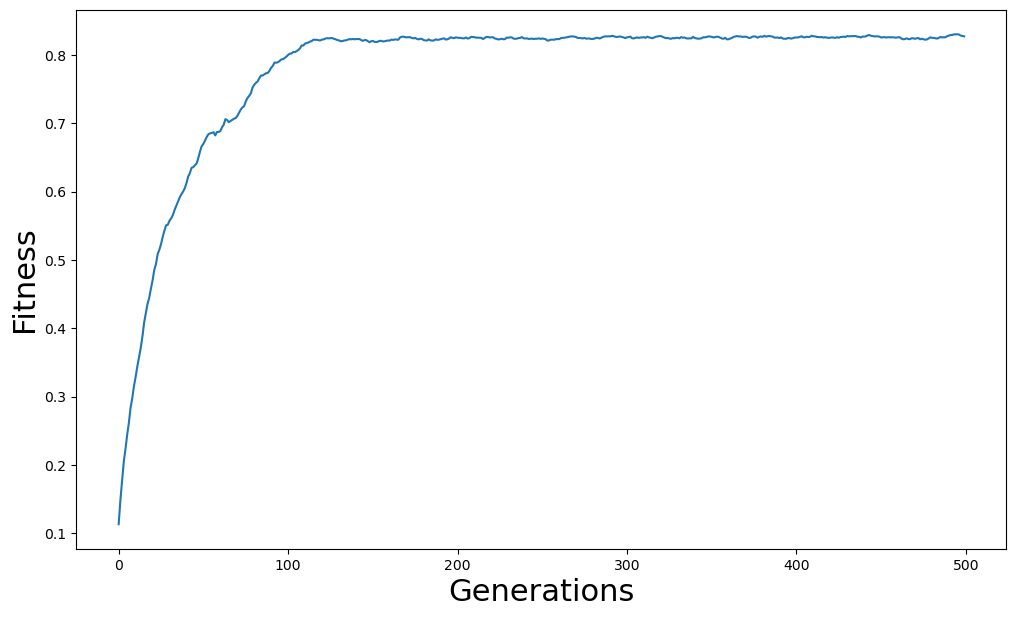

In [37]:
plt.figure(figsize=(12,7))
plt.xlabel("Generations",fontsize=22)
plt.ylabel("Fitness",fontsize=22)
plt.plot(pop_fit)